## An exploratory analysis of the PVQD Dataset with the K-means algorithm


The five perceptual characteristics in CAPE-V rating each convery a different aspect of voice. While there is no one-to-one mapping of voice disorder diagonosis with rating, there is trend in the rating that reflect the physiological states of different disorders. 

1. Vocal fold paresis / par

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv('/Users/ruiqingfan/Documents/INDE-577-24/INDE-577-24-1/Combined_PVQD_CAPEV.csv', delimiter=',')
df.dataframeName = 'Combined_PVQD_CAPEV.csv'

In [32]:

print(df[['Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain']].isnull().sum())
# Drop rows with missing values (if any)
df = df.dropna(subset=['Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain'])
# Selecting the variables of interest
X = df[['Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain']].values

Roughness      0
Pitch          0
Loudness       0
Breathiness    0
Strain         0
dtype: int64


In [33]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
# Initialize the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X_scaled)

/Users/ruiqingfan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [63]:
df['Cluster'] = kmeans.labels_

In [64]:
# Calculate the silhouette score
score = silhouette_score(X_scaled, kmeans.labels_)
print('Silhouette Score:', score)

Silhouette Score: 0.6127953327339373


/Users/ruiqingfan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


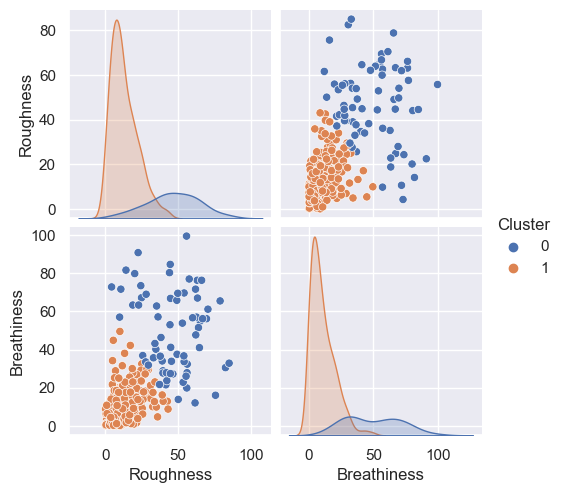

In [65]:
# Pairplot colored by cluster label
sns.pairplot(df[['Roughness','Breathiness','Cluster']], hue='Cluster')
plt.show()

/Users/ruiqingfan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.6127435947757309


/Users/ruiqingfan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


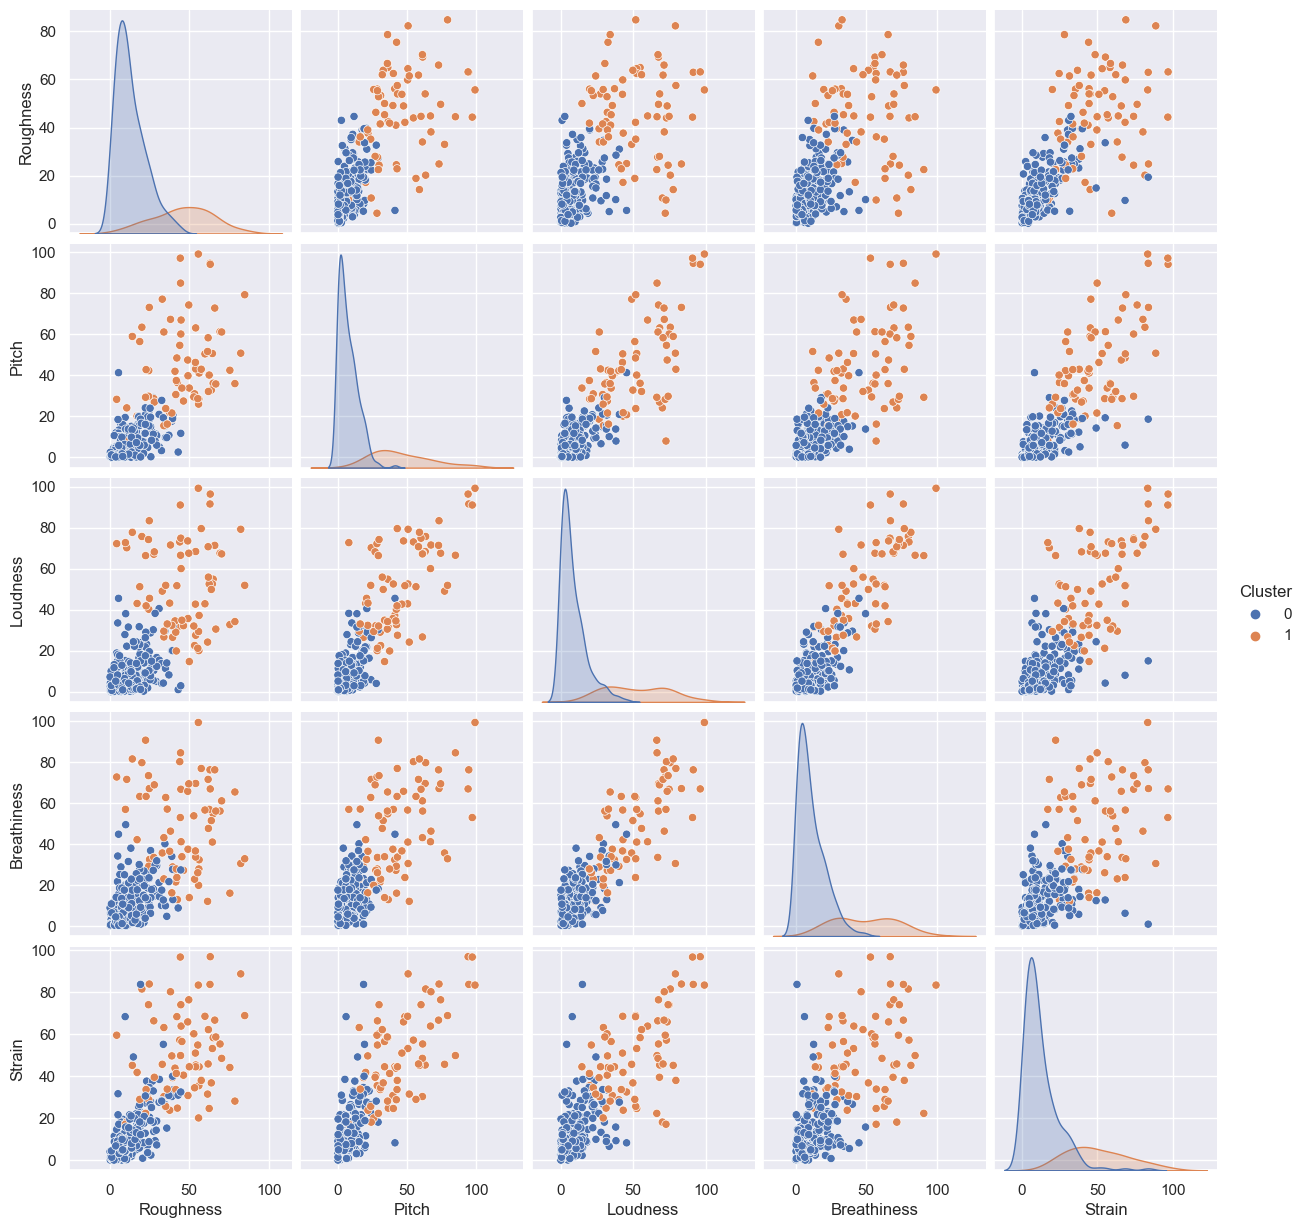

In [31]:
# Initialize the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X_scaled)

# Calculate the silhouette score
score = silhouette_score(X_scaled, kmeans.labels_)
print('Silhouette Score:', score)
df['Cluster'] = kmeans.labels_
sns.pairplot(df[['Roughness', 'Pitch', 'Loudness', 'Breathiness', 'Strain', 'Cluster']], hue='Cluster')
plt.show()

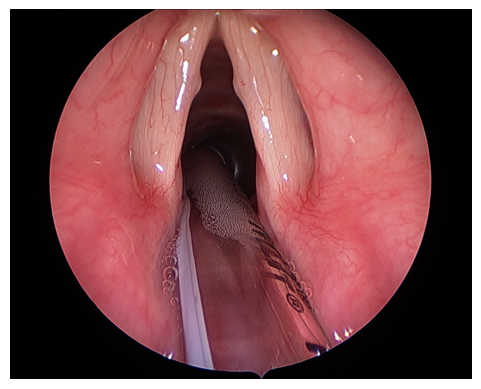

In [80]:
from matplotlib.image import imread
image = imread("/Users/ruiqingfan/Documents/INDE-577-24/INDE-577-24-1/nodules_op_1.png")
image.shape
plt.imshow(image)
plt.axis('off') 
plt.show()


/Users/ruiqingfan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


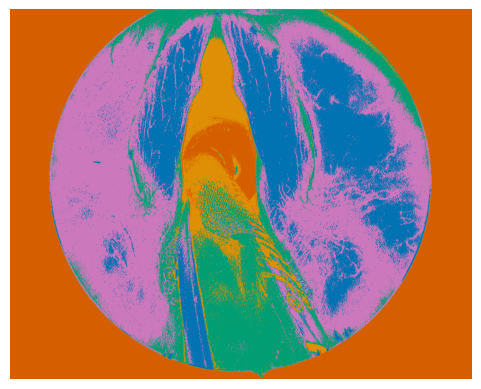

In [102]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=5).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)


# Select a color palette from seaborn
palette = sns.color_palette("colorblind", 5)  # 'bright' is one of the available seaborn palettes
new_colors = np.array(palette) * 255  # Convert from [0,1] to [0,255] RGB format
# Map cluster labels to new colors
new_segmented_img = np.zeros((X.shape[0], 3))  # Create a new image array with the same number of pixels
for i in range(5):
    new_segmented_img[kmeans.labels_ == i] = new_colors[i]

# Reshape back to the original image shape
segmented_img = new_segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.axis('off')
plt.show()
